In this notebook, we will perform some exploratory visualization of the MovieLens dataset.

In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font_kwargs = {'family': 'sans-serif',
               'sans-serif': 'Arial',
               'size': 12}
plt.rc('font', **font_kwargs)
mathtext_kwargs = {'fontset': 'custom',
                   'bf': 'Arial:bold',
                   'cal': 'Arial:italic',
                   'it': 'Arial:italic',
                   'rm': 'Arial'}
plt.rc('mathtext', **mathtext_kwargs)
savefig_kwargs = {'dpi': 300, 'bbox_inches': 'tight',
                  'transparent': True}
plt.rc('pdf', fonttype=42)
#%config InlineBackend.figure_format = 'pdf'
%config InlineBackend.print_figure_kwargs = savefig_kwargs

We start by reading in the data.

In [3]:
# Read in data on ratings
ratings = pd.read_csv(os.path.join('data', 'data.txt'),
                      sep='\t', header=None,
                      names=['User ID', 'Movie ID', 'Rating'])

# Read in information on movies
names = ['Movie ID', 'Movie Title', 'Unknown', 'Action',
         'Adventure', 'Animation', 'Children\'s', 'Comedy',
         'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(os.path.join('data', 'movies.txt'),
                     sep='\t', header=None,
                     encoding='latin_1', names=names)
movies['Movie Title'] = movies['Movie Title'].str.strip()

# Separate movie name and year if desired
split_year = False
if split_year:
    movies.loc[266, 'Movie Title'] = 'unknown (0000)'
    movies.loc[1411, 'Movie Title'] = \
        'Land Before Time III: The Time of the Great Giving (V) (1995)'
    movies['Year'] = [int(title[-5:-1]) for title in movies['Movie Title']]
    movies['Movie Title'] = [title[:-7] for title in movies['Movie Title']]

# Merge ratings data with movie metadata
data = ratings.merge(movies, how='left', on='Movie ID')

We can then visualize the desired information.

## 1. All ratings in the MovieLens dataset

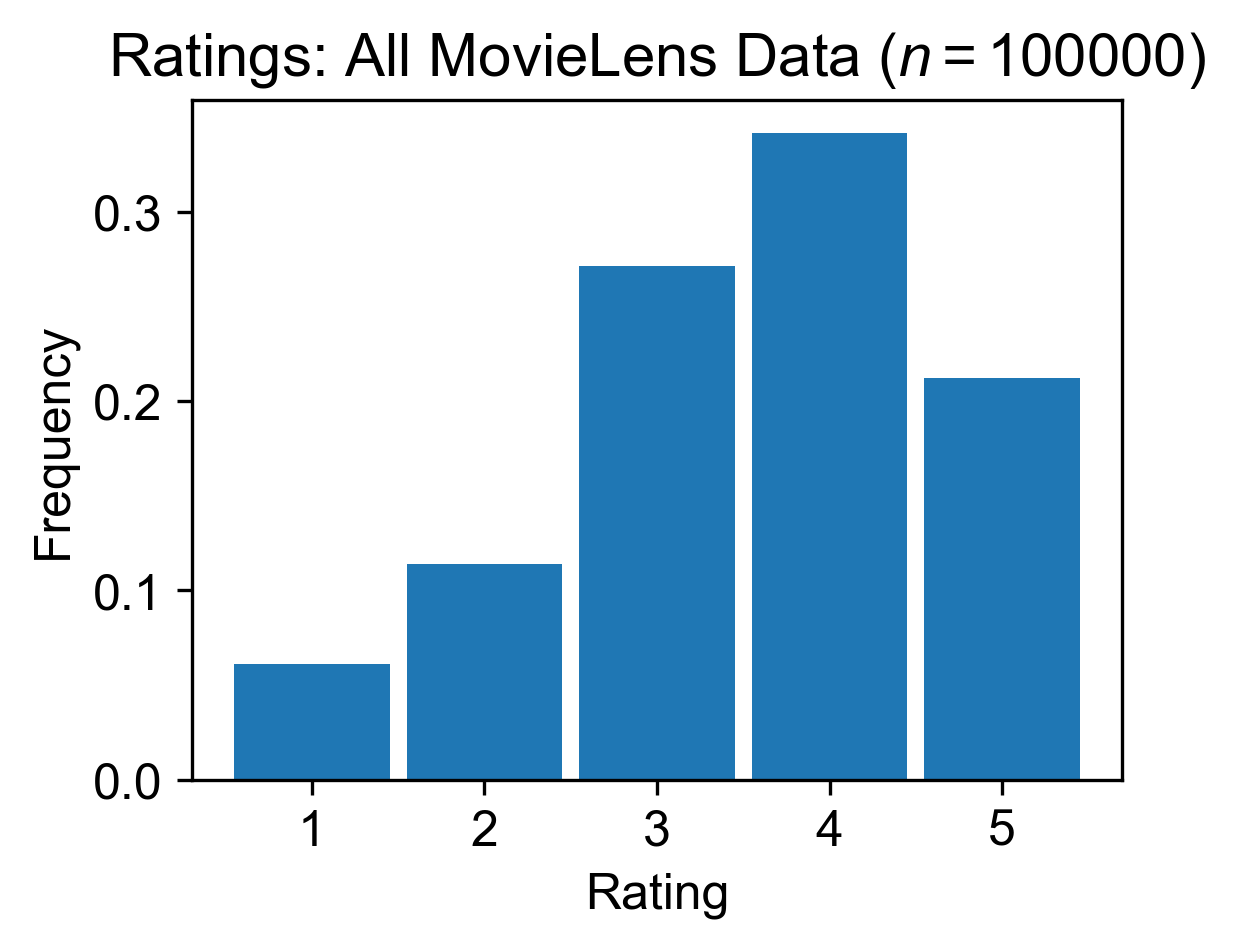

In [4]:
# Plot histogram for all ratings in dataset
vals = data['Rating']
plt.figure(figsize=(4, 3))
plt.hist(vals,
         bins=np.arange(0.5, np.max(data['Rating']) + 1, 1),
         density=True, rwidth=0.9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(r'Ratings: All MovieLens Data ($n = {:d}$)'.format(len(vals)));

## 2. All ratings of the ten most popular movies

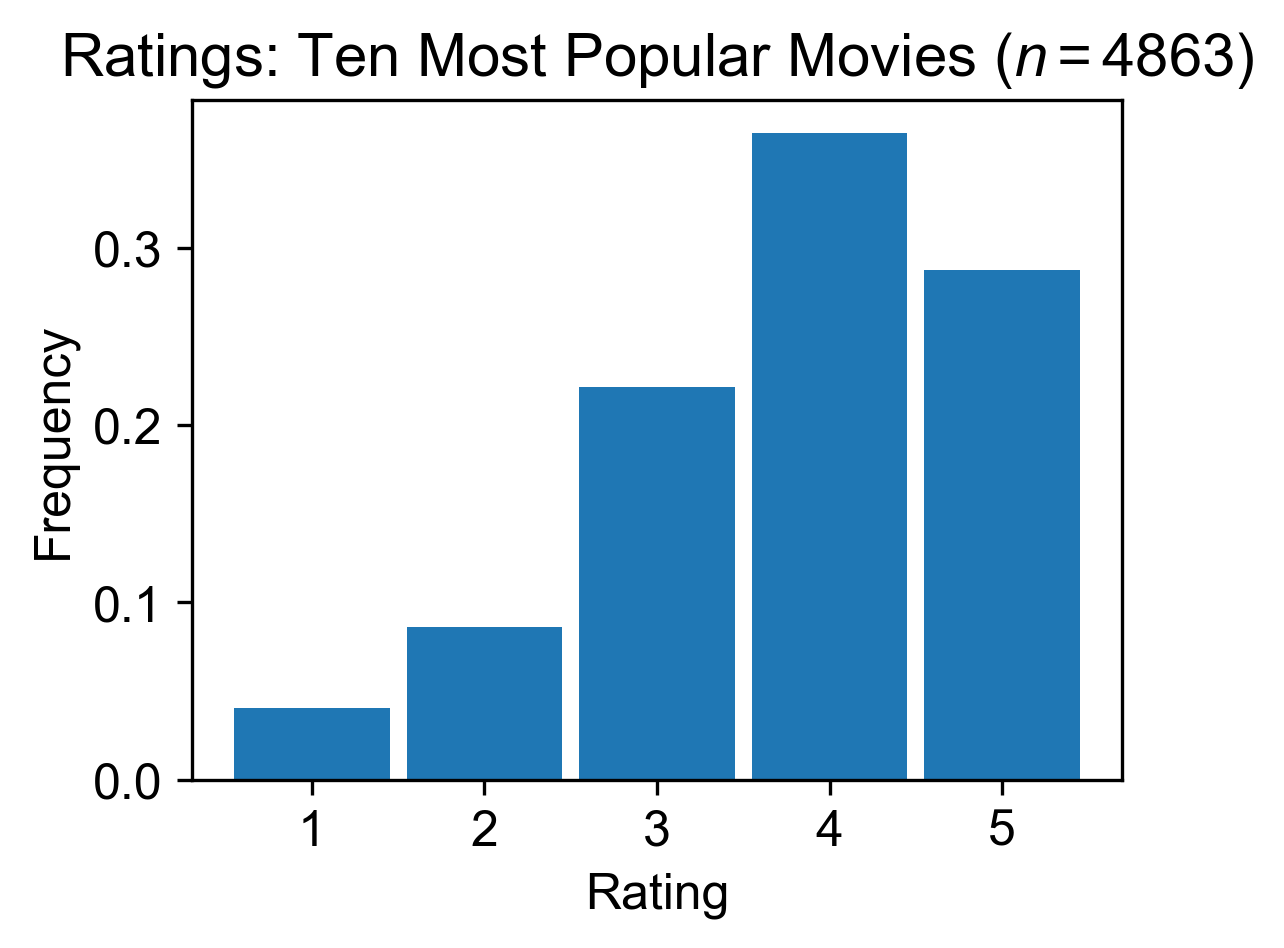

In [5]:
# Extract IDs of most popular movies
n = 10
ids, counts = np.unique(data['Movie ID'], return_counts=True)
movie_ids = set(ids[np.argsort(counts)[-n:]])

# Plot histogram for all ratings of most popular movies
vals = [data['Rating'][i] for i in range(len(data['Rating']))
        if data['Movie ID'][i] in movie_ids]
plt.figure(figsize=(4, 3))
plt.hist(vals,
         bins=np.arange(0.5, np.max(data['Rating']) + 1, 1),
         density=True, rwidth=0.9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(r'Ratings: Ten Most Popular Movies ($n = {:d}$)'.format(len(vals)));

## 3. All ratings of the ten best movies

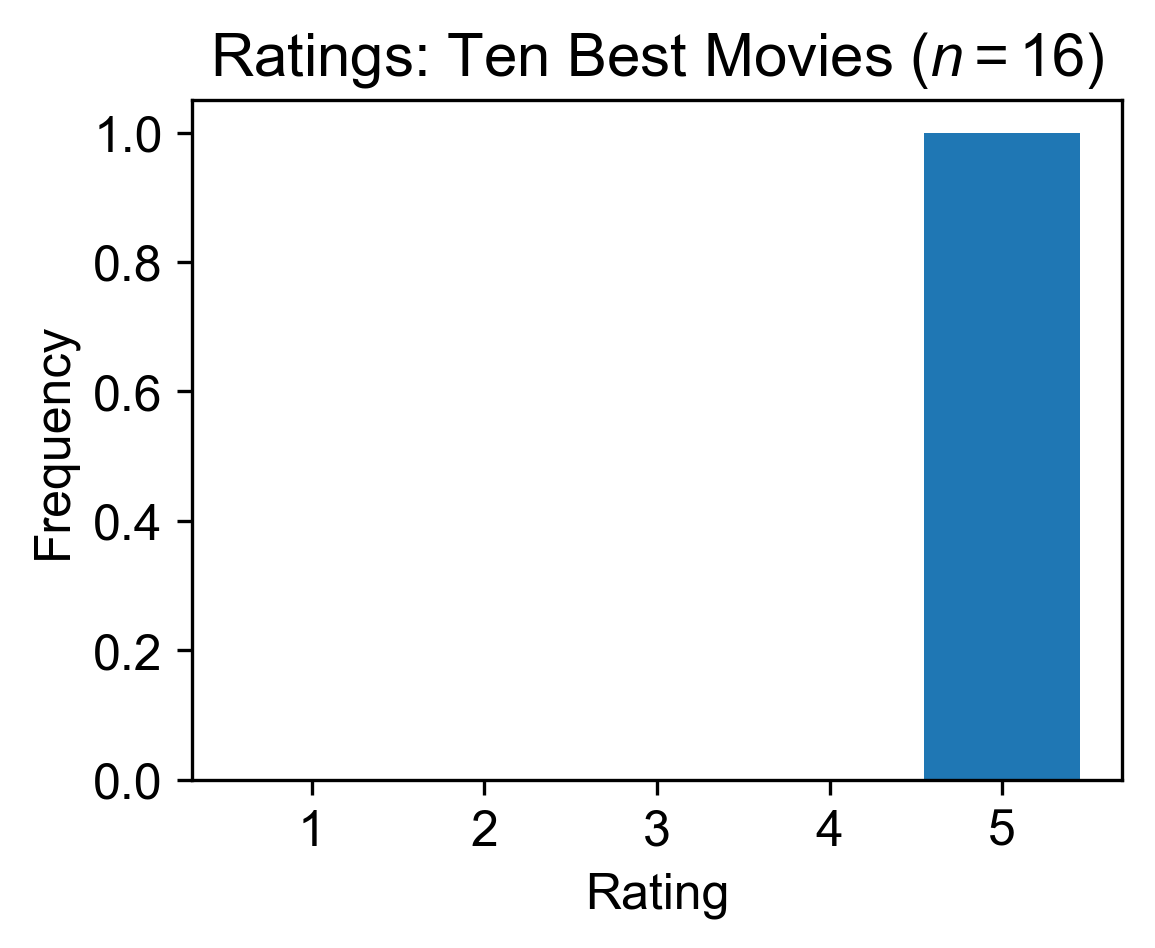

In [6]:
# Extract IDs of best movies
n = 10
mean_ratings = data[['Movie ID', 'Rating']].groupby(
    'Movie ID').agg('mean').reset_index()
movie_ids = set(mean_ratings.sort_values(
    'Rating', ascending=False)['Movie ID'][:n])

# Plot histogram for all ratings of best movies
vals = [data['Rating'][i] for i in range(len(data['Rating']))
        if data['Movie ID'][i] in movie_ids]
plt.figure(figsize=(4, 3))
plt.hist(vals,
         bins=np.arange(0.5, np.max(data['Rating']) + 1, 1),
         density=True, rwidth=0.9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(r'Ratings: Ten Best Movies ($n = {:d}$)'.format(len(vals)));

## 4. All ratings of movies from specific genres

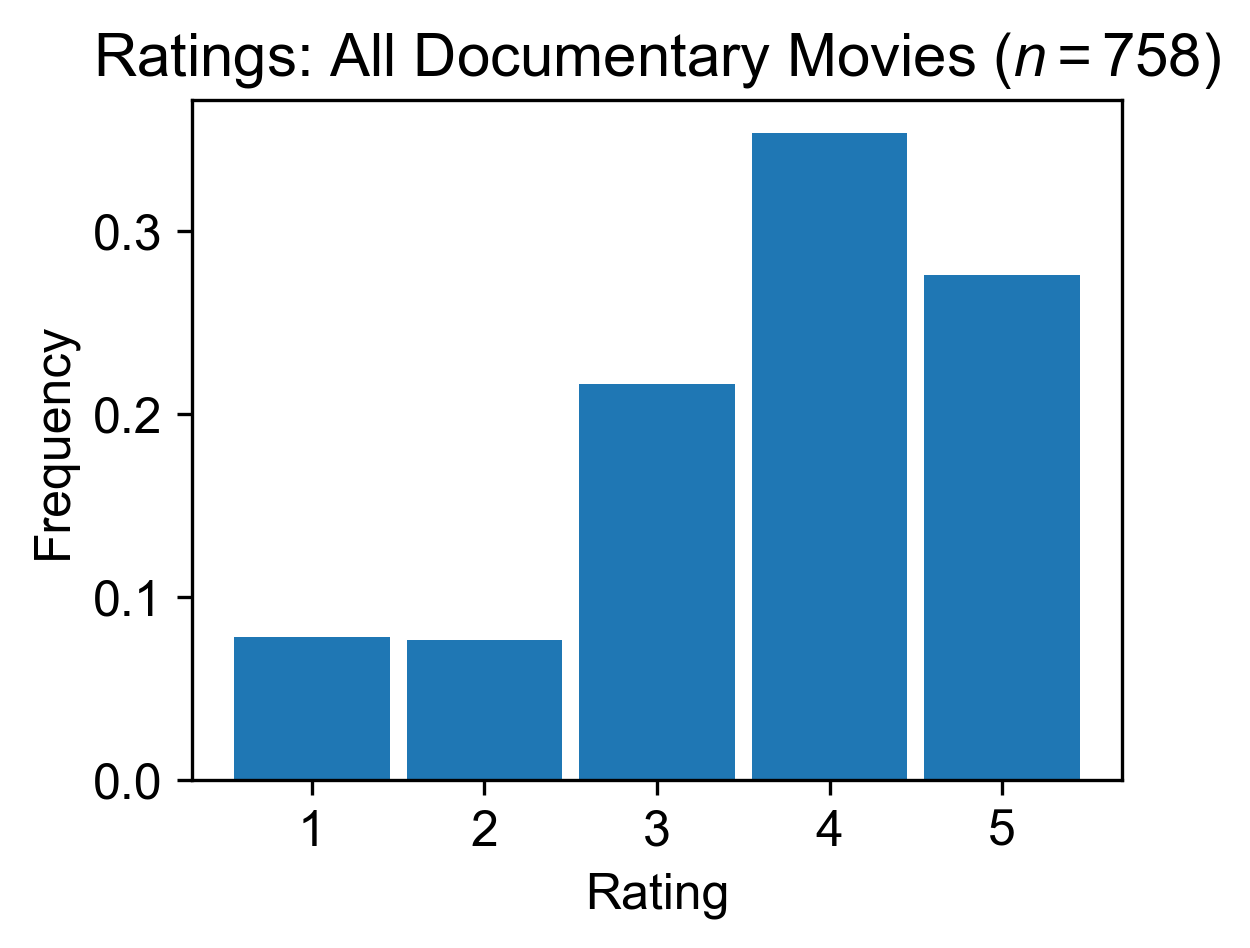

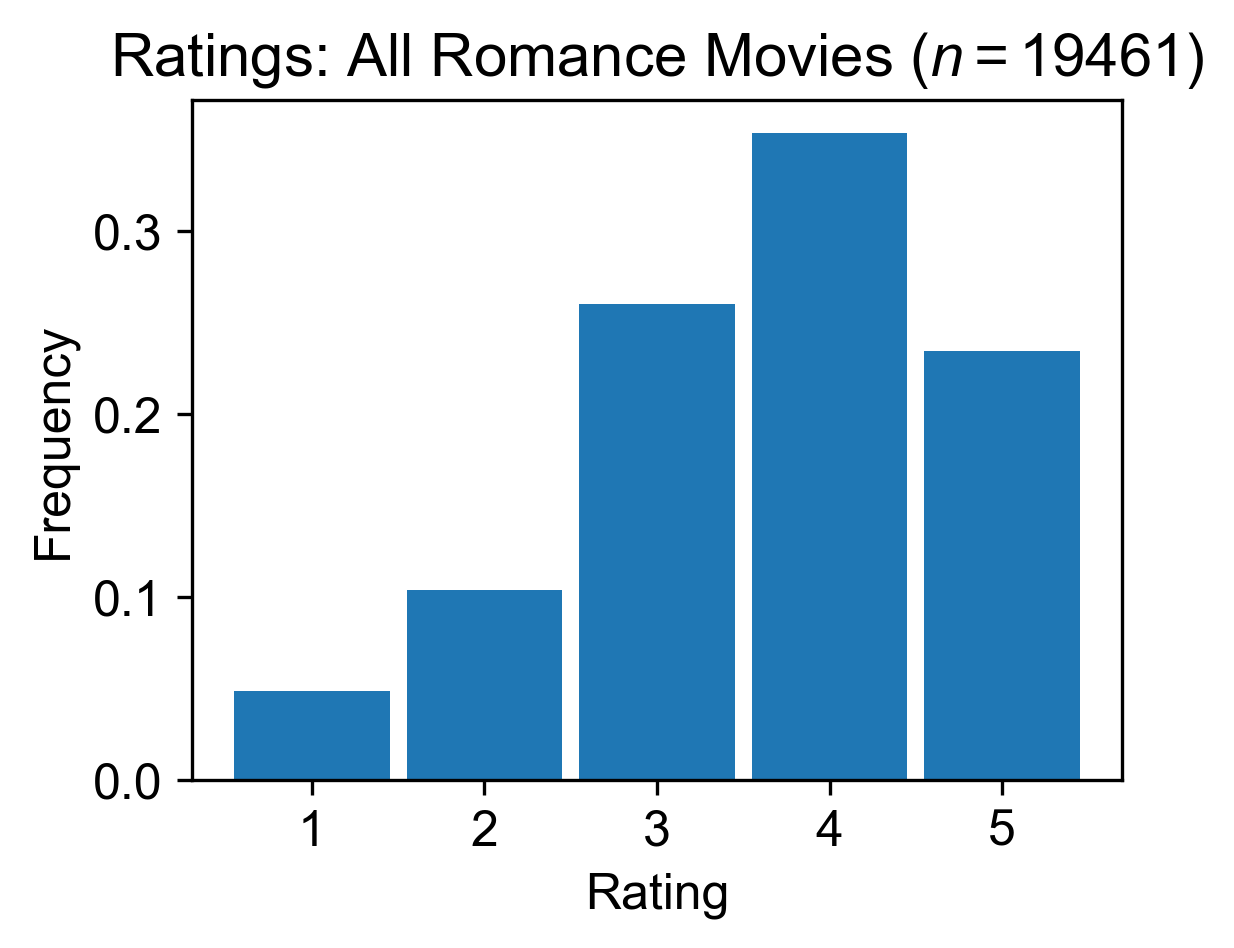

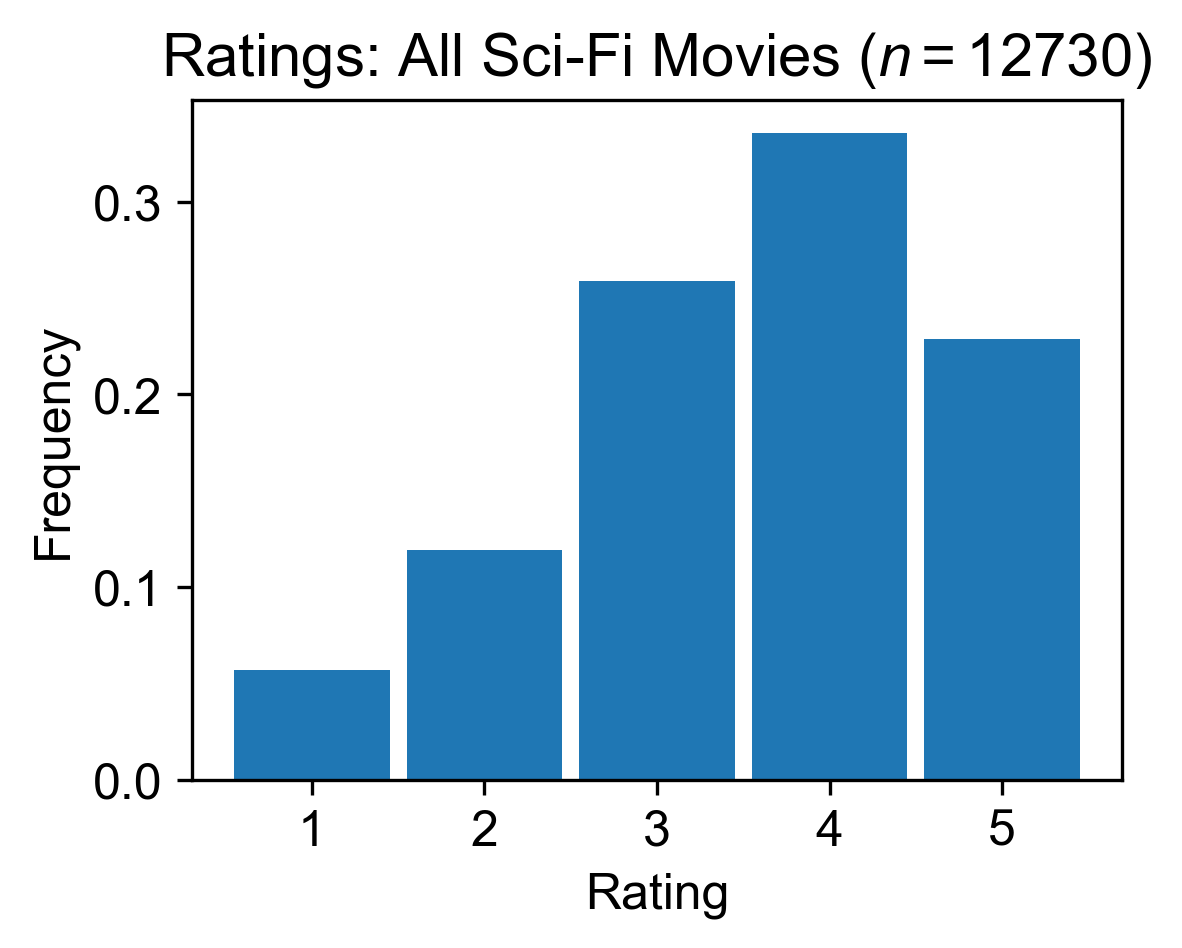

In [7]:
# Specify genres of interest
genres = ['Documentary', 'Romance', 'Sci-Fi']

# Plot histogram for all ratings in each genre
for genre in genres:
    vals = [data['Rating'][i] for i in range(len(data['Rating']))
            if data[genre][i] == 1]
    plt.figure(figsize=(4, 3))
    plt.hist(vals,
             bins=np.arange(0.5, np.max(data['Rating']) + 1, 1),
             density=True, rwidth=0.9)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(r'Ratings: All {:s} Movies ($n = {:d}$)'.format(
              genre, len(vals)));